In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import scipy.stats as st
import re

In [2]:
# Get the data together from the csv
csvpath = os.path.join("ParseableData_Table-21.csv")
sex_type = ''
data = {
    'Year' : [],
    'Total' : [],
    'White' : [],
    'Black' : [],
    'Asian' : [],
    'Hispanic' : [],
    'Sex (M or F)' : []
}

with open(csvpath, newline='') as csvfile:
    csvread = csv.reader(csvfile, delimiter=',')
    
    for row in csvread:
        try:
            if row[0] in ['', 'Year']:
                next
            elif row[0] in ['Total', 'Women', 'Men']:
                sex_type = row[0]
            elif int(row[0]) in range(1979, 2020):
                data['Year'].append(int(row[0]))
                data['Total'].append(float(re.sub('[$,]', '', row[1])))
                data['White'].append(float(re.sub('[$,]', '', row[2])))
                data['Black'].append(float(re.sub('[$,]', '', row[3])))

                data['Asian'].append(float(re.sub('[$,]', '', row[4])) if "â€" not in row[4] else '\0')

                data['Hispanic'].append(float(re.sub('[$,]', '', row[5])))
                data['Sex (M or F)'].append(sex_type if sex_type in ['Women', 'Men'] else "Both")
        except ValueError:
            print(f"Skipping Row\n{row}\n")

Data_df = pd.DataFrame(data=data, columns=data.keys())
Data_df

Skipping Row
['ï»¿"Table 21. Inflation-adjusted median hourly earnings', ' by race and Hispanic or Latino ethnicity', ' for wage and salary workers paid hourly rates', ' 1979-2018 annual averages"', '', '', '', '', '']

Skipping Row
['[In constant 2018 dollars]', '', '', '', '', '']

Skipping Row
['Note: The comparability of historical labor force data has been affected at various times by methodological and other changes in the Current Population Survey (CPS). Information about historical comparability is online at https://www.bls.gov/cps/documentation.htm#comp. As of 2003, estimates for the race groups shown (White, Black or African American, and Asian) include people who selected that race group only; people who selected more than one race group are not included. Prior to 2003, people who reported more than one race were included in the group they identified as the main race. Asian data for 2000-2002 are for Asians and Pacific Islanders. As of 2003, Asians constitute a separate cate

,Year,Total,White,Black,Asian,Hispanic,Sex (M or F)
0,1979,14.37,14.60,13.30, ,13.20,Both
1,1980,14.01,14.19,12.91, ,12.91,Both
2,1981,13.70,13.78,13.03, ,12.79,Both
3,1982,13.53,13.71,12.68, ,12.56,Both
4,1983,13.44,13.61,12.38, ,12.24,Both
...,...,...,...,...,...,...,...
115,2014,15.28,15.77,12.96,15.56,13.14,Men
116,2015,15.56,15.83,13.43,15.77,13.70,Men
117,2016,15.65,15.83,13.66,15.73,14.47,Men
118,2017,15.57,16.18,13.67,17.06,14.72,Men


In [3]:
# Can't keep the non-numeric Asian data for proper analysis, so make two
# dataframes; one with and one without Asians
filtered_Asian_data = Data_df.loc[Data_df['Asian'] != '\0']
filtered_nonAsian_data = Data_df.drop(columns=['Asian'])

In [4]:
# Now get the differences that You'll use later
def add_diff_column(col_name, dataframe):
    try:
        print(f"Column {col_name} Already exists in DataFrame with {dataframe[col_name].count()} entries")
    except KeyError:
        name_filter = col_name.split(' ')
        data_to_add = []

        for i in dataframe.index:
            data_to_add.append(dataframe[name_filter[0]][i] - dataframe["Total"][i])

        column_series = pd.Series(data_to_add, name=col_name, dtype='float64', index=dataframe.index)
        dataframe[col_name] = column_series

add_diff_column('Asian Diff', filtered_Asian_data)
add_diff_column('Black Diff', filtered_nonAsian_data)
add_diff_column('White Diff', filtered_nonAsian_data)
add_diff_column('Hispanic Diff', filtered_nonAsian_data)

C:\Users\jcjwg\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


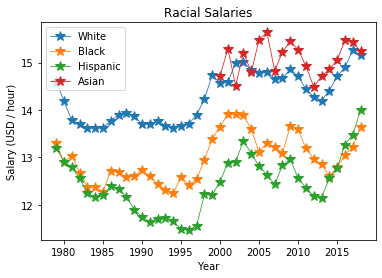

<Figure size 432x288 with 0 Axes>

In [5]:
# Make the plots; plots of lots!
both_sexes = filtered_nonAsian_data.loc[filtered_nonAsian_data['Sex (M or F)'] == 'Both']
both_sexes_asian = filtered_Asian_data.loc[filtered_Asian_data['Sex (M or F)'] == 'Both']

def print_and_save_lineplot(title, graph_dict, dataframe_1, dataframe_2):
    main_fig, main_plot = plt.subplots(sharex=True, sharey=True)
    main_plot.set_title(title)
    main_plot.set_xlabel('Year')
    main_plot.set_ylabel('Salary (USD / hour)')

    for trait in graph_dict:
        if graph_dict[trait] == 1:
            main_plot = plt.plot(
                [year for year in dataframe_1['Year']],
                [salary for salary in dataframe_1[trait]],
                marker='*',
                linewidth=0.8,
                markersize=10,
                label=trait
            )
        elif graph_dict[trait] == 2:
            main_plot = plt.plot(
                [year for year in dataframe_2['Year']],
                [salary for salary in dataframe_2[trait]],
                marker='*',
                linewidth=0.8,
                markersize=10,
                label=trait
            )
        else:
            main_plot = plt.plot(
                [year for year in dataframe_1['Year']],
                [salary for salary in dataframe_1[trait]],
                marker='*',
                linewidth=0.8,
                markersize=10,
                label=trait
            )
            main_plot = plt.plot(
                [year for year in dataframe_2['Year']],
                [salary for salary in dataframe_2[trait]],
                marker='*',
                linewidth=0.8,
                markersize=10,
                label=trait
            )
            
    plt.legend()
    plt.savefig(f'Save_Data/{title}.png')
    plt.show()
    plt.tight_layout()

# First Shot
Race_Dict = {
    'White' : 1,
    'Black' : 1,
    'Hispanic' : 1,
    'Asian' : 2
}

print_and_save_lineplot('Racial Salaries', Race_Dict, both_sexes, both_sexes_asian)

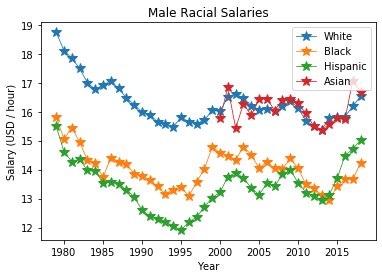

<Figure size 432x288 with 0 Axes>

In [6]:
male_sexes = filtered_nonAsian_data.loc[filtered_nonAsian_data['Sex (M or F)'] == 'Men']
male_sexes_asian = filtered_Asian_data.loc[filtered_Asian_data['Sex (M or F)'] == 'Men']

print_and_save_lineplot('Male Racial Salaries', Race_Dict, male_sexes, male_sexes_asian)

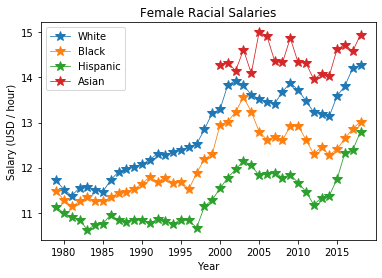

<Figure size 432x288 with 0 Axes>

In [7]:
female_sexes = filtered_nonAsian_data.loc[filtered_nonAsian_data['Sex (M or F)'] == 'Women']
female_sexes_asian = filtered_Asian_data.loc[filtered_Asian_data['Sex (M or F)'] == 'Women']

print_and_save_lineplot('Female Racial Salaries', Race_Dict, female_sexes, female_sexes_asian)

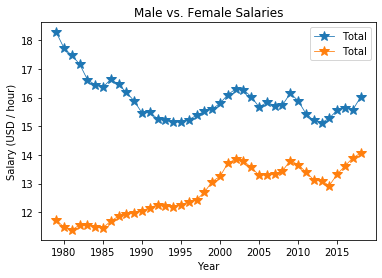

<Figure size 432x288 with 0 Axes>

In [8]:
sexes_dict = {'Total' : 3}

print_and_save_lineplot('Male vs. Female Salaries', sexes_dict, male_sexes, female_sexes)

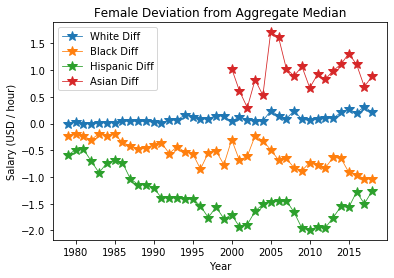

<Figure size 432x288 with 0 Axes>

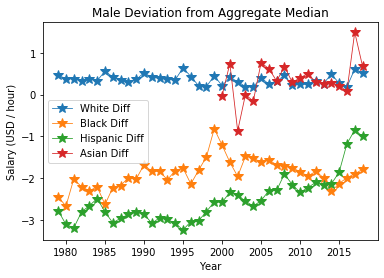

<Figure size 432x288 with 0 Axes>

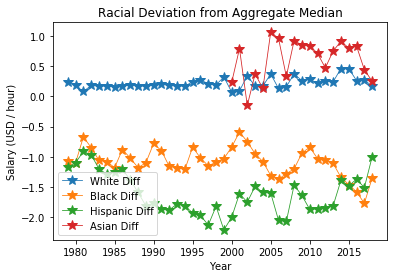

<Figure size 432x288 with 0 Axes>

In [9]:
diff_data = {
    'White Diff' : 1,
    'Black Diff' : 1,
    'Hispanic Diff' : 1,
    'Asian Diff' : 2
}

print_and_save_lineplot('Female Deviation from Aggregate Median', diff_data, female_sexes, female_sexes_asian)
print_and_save_lineplot('Male Deviation from Aggregate Median', diff_data, male_sexes, male_sexes_asian)
print_and_save_lineplot('Racial Deviation from Aggregate Median', diff_data, both_sexes, both_sexes_asian)

In [10]:
# Calculate the Differences of Men and Women from Both


In [11]:
# Calculate the recent (2000's) stats


In [12]:
# Run Regression Testing (2000's data)
